# Basic Overview

Currently, the simetri.graphics library is in its early stages. There are only two main objects that are used to create all other entities. These are:

- **Shape**: Represents a sequence of connected vertices. Currently, only 2D vertices are supported. They can have styling attributes such as line color, line width, fill color, shading etc. 
- **Batch**: Groups multiple *Shape* and/or *Batch* objects. They can be used to manipulate multiple objects at once.


**Canvas** objects provide a way to render geometry. They can be used in Jupyter notebooks to display graphics output in output cells or to create output files in .tex, .pdf, .ps, .eps, .svg, and .png formats.

In addition to these objects, simetri.graphics provides transformation functions that can be used to manipulate the vertices of the Shape objects. These functions include:
- **Translation**: Moves points by a specified distance and direction.
- **Rotation**: Rotates points by a specified angle about a given point.
- **Reflection**: Mirrors points about a given line.
- **Gliding**: First reflects points about a given line and then translates them by a specified distance along the same line.
- **Scaling**: Scales points by a specified factor about a given point.
- **Shearing**: Shears (skews) points by a specified factor about a given axis.

These transformations can be applied individually or combined to create complex transformations.

Both *Shape* and *Batch* objects have **boundary boxes** that can be used to specify reference lines and points.

## Creating Shape Objects

*Shape* objects can be created by passing a list of vertices to the *Shape* constructor. They can be closed or not. For example, to create a triangle with vertices at (0, 0), (50, 0), and (0, 50), you can use the following code:

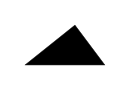

In [3]:
import simetri.graphics as sg

canvas = sg.Canvas()
triangle = sg.Shape(points=[(0, 0), (50, 40), (80, 0)], closed=True)
canvas.draw(triangle)

canvas.display()

### Notes:

- We should import the library using `import simetri.graphics as sg`.
- If we don't explicitly specify that a shape is closed or define the same coordinate for the first and last vertex, the library will assume that it is not closed.
- If we don't specify any cosmetic attributes, the library will use default values.
- *Canvas* objects will generate an appropriately sized output if we do not specify the size. There is no default size but there are default margins, background color, and blending modes.
- The units by default are in points (1 inch = 72 points).
- The origin is at the bottom left corner of the canvas.
- The x-axis increases to the right and the y-axis increases upwards.

- `canvas.display()` is usually the last line of the scripts.

> [!CAUTION]  
> Never import the library using: 
> - `from simetri import *` 
> - `from simetri.graphics import *`

### Transforming Shapes

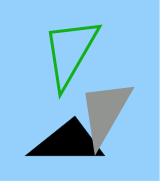

In [4]:
import simetri.graphics as sg

canvas = sg.Canvas(back_color=sg.light_blue)
triangle = sg.Shape([(0, 0), (50, 40), (80, 0)], closed=True)
triangle2 = triangle.copy()
triangle3 = triangle.copy()
triangle2.translate(dx=70, dy=0).rotate(angle=sg.pi/3)
# rotations are about the origin by default
triangle3.rotate(angle=sg.pi/3).translate(dx=70, dy=0)
canvas.draw(triangle)
canvas.draw(triangle2, fill=False, line_width=3, line_color=sg.green)
canvas.draw(triangle3, stroke=False, fill_color=sg.gray, line_width=3)

canvas.display()

### Notes:
    
- All angles in *simetri.graphics* are specified in radians.
- Style attributes can be overwritten by *canvas.draw* method.
- Transformations can be chained together.
- Order of transformations may matter. Translation then rotation may be different from rotation then translation.
- Rotations are about the origin by default.
- If the `stroke == False` then the *line_width* doesn't matter.
- Canvas size is automatically computed.
- The order of *canvas.draw* calls matters if the objects overlap.
- Scale -> Rotate -> Translate distorts the axes while Translate -> Rotate -> Scale does not.

### Transformations with Repetitions

Any transformation can be applied successively. This returns a new *Batch* object populated with the transformed copies of the target object.

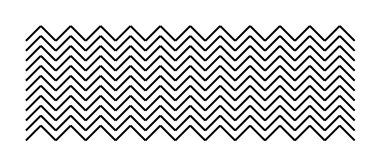

In [5]:
import simetri.graphics as sg

canvas = sg.Canvas()


points  = [(0, 0), (15, 15)]
kernel = sg.Shape(points)
zigzag = kernel.mirror(kernel.right, reps=1).translate(dx=30, reps=10)
zigzag.translate(dy=10, reps=10)
canvas.draw(zigzag, line_width=2)

canvas.display()

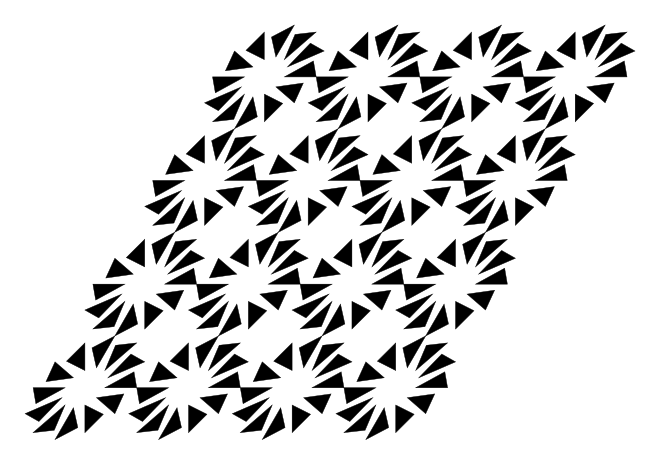

In [6]:
import simetri.graphics as sg

canvas = sg.Canvas()
triangle = sg.Shape([(50, 0), (100, 40), (130, 0)], closed=True)
triangles = triangle.rotate(sg.pi/6, reps=11).translate(dx=260, reps=3)
canvas.draw(triangles.translate(dy=260, reps=3).scale(.4).shear(sg.pi/6, 0))
canvas.display()


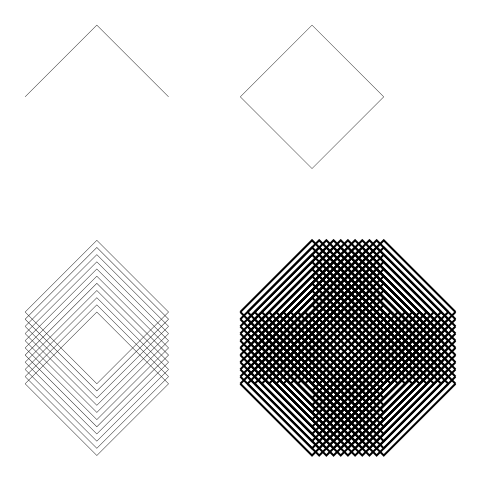

In [7]:
import simetri.graphics as sg

canvas = sg.Canvas()
canvas.scale(72)
n = 8
points  = [(0, 0), (1, 1), (2, 0)]
kernel = sg.Shape(points)
canvas.draw(kernel)
canvas.translate(3, 0)
petal = kernel.mirror(sg.axis_x, reps=1)
canvas.draw(petal)
canvas.translate(-3, -4)
petal.translate(dy=.1, reps=10)
canvas.draw(petal)
canvas.translate(3, 0)
petal.translate(dx=.1, reps=10)
canvas.draw(petal, line_width=2)

canvas.display()

### Notes:

- Transformations with repetitions do not alter the target object. A new *Batch* object with the target object and multiple transformed copies of the target object gets created.
- *Batch* objects can modify all its elements via `batch.set_attribs` method.
- Drawing a *Batch* object is equivalent to drawing its elements individually.
> [!IMPORTANT]  
> When you transform a Shape with repetitions, target shape along with the transformed copies are returned in a new B> [!IMPORTANT]  
> When you transform a Shape with repetitions, target shape along with the transformed copies are returned in a new Batch.
> When you transform a Batch with repetitions, transformed copies are appended to the target Batch object.atch.
> When you transform a Batch with repetitions, transformed copies are appended to the target Batch object.
> [!IMPORTANT]  
> - When you transform a Shape with repetitions, target shape along with the transformed copies are returned in a new Batch.
> - When you transform a Batch with repetitions, transformed copies are appended to the target Batch object.

## Composite Transformations

All individual transformations can be combined with each other. When we combine transformations the order may matter. The transformations are applied from left to right.

> [!IMPORTANT]  
> When you transform a Shape with repetitions, target shape along with the transformed copies are returned in a new Batch. You need to catch the returned Batch.
> When you transform a Batch with repetitions, transformed copies are appended to the target Batch object. Since the returned Batch already exists, you do not need to catch the returned Batch.

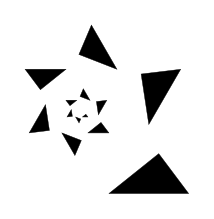

In [8]:
import simetri.graphics as sg

canvas = sg.Canvas()
triangle = sg.Shape([(0, 0), (50, 40), (80, 0)], closed=True)

translate = sg.translation_matrix(dx=100, dy=0)
rotate = sg.rotation_matrix(sg.pi/3)
scale = sg.scale_matrix(scale_x=.8, scale_y=.8)
comp_transform = translate @ rotate @ scale

triangles = triangle.transform(comp_transform, reps=12)

canvas.draw(triangles)

canvas.display()

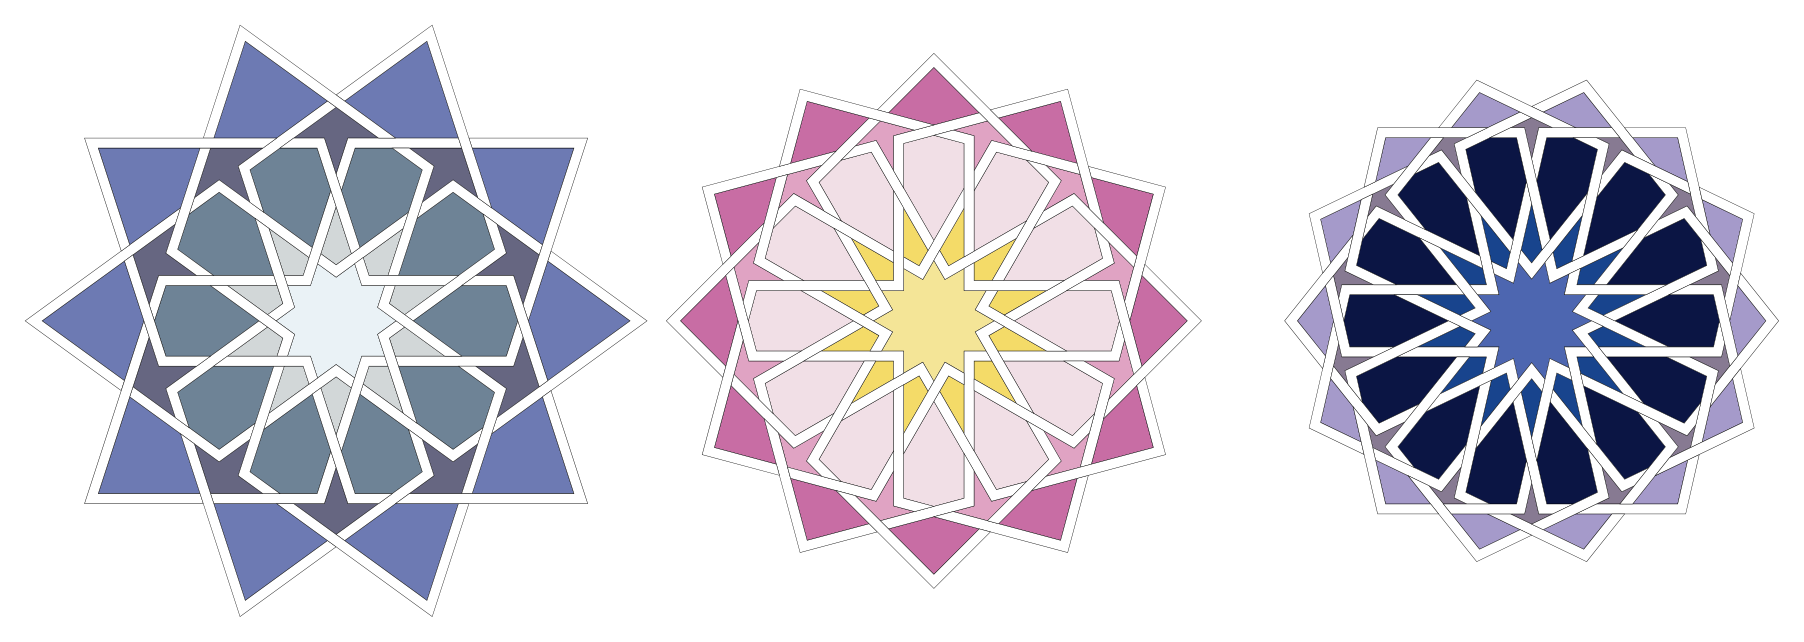

In [15]:
import simetri.graphics as sg

canvas = sg.Canvas()
Star = sg.stars.Star
radius = 50
gap = 300
for  i in range(10, 15, 2):
    star = Star(i, radius).level(4)
    star.translate(i * gap, 0)
    swatch = sg.random_swatch()
    lace = sg.Lace(star, offset=5,
                    swatch=swatch)

    canvas.draw(lace)

canvas.display()